In [37]:
import os
import pickle
import keras
import time

import numpy as np
import pandas as pd
import seaborn as sn
import random as rn
import tensorflow as tf
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [38]:
########################################
#  混同行列 
########################################
def RF_print_cmx(y_true, y_pred):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)

    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)

    plt.figure(figsize = (12,8))
    sn.heatmap(df_cmx, annot=True, fmt="d") ### ヒートマップの表示仕様
    plt.title("Confusion Matrix")
    plt.xlabel("predict_classes")
    plt.ylabel("true_classes")
    print('スポーツ : 0 / IT : 1 / 映画 : 2 / ライフ : 3')
    plt.show()

In [39]:
########################################
# ランダムフォレスト 
########################################
# データベースの読込 --- (*2)
data=pickle.load(open('/Users/Baron/Document/text_mining/Data/pickle/TF-IDF/Body/tfidf_body.pickle', "rb"))
z = data[0]
y = data[1]
x = data[2]
kf = KFold(n_splits=5, shuffle=True, random_state=0)

A_index = []
B_index = []
C_index = []
D_index = []
E_index = []
F_index = []
pred_index = []

for train, test in kf.split(x):
    A = []
    B = []
    C = []
    D = []
    E = []
    F = []
    for i in test:
        A.append(x[i])       # x_test
        C.append(y[i])       # y_test
        E.append(z[i])       # z_test
    A_index.append(A)
    C_index.append(C)
    E_index.append(E)
    for j in train:
        B.append(x[j])       # x_train
        D.append(y[j])       # y_train
        F.append(z[j])       # z_train
    B_index.append(B)
    D_index.append(D)
    F_index.append(F)

In [40]:
def RF(x_test, x_train, y_test, y_train, z_test, z_train):
    RF_model = RandomForestClassifier()
    t1 = time.time()                 #　開始
    # 学習      
    RF_model.fit(x_train, y_train)
    t2 = time.time()                #　終了
    predict = RF_model.predict(x_test)
    pred_index.append(predict)
    
    accuracy = metrics.accuracy_score(y_test, predict)
    cl_report = metrics.classification_report(y_test, predict)

    print('Train score: {}'.format(RF_model.score(x_train, y_train)))
    print("正解率 = ", accuracy)
    print("レポート\n", cl_report)
    
    RF_print_cmx(y_test, predict)
    
    # 経過時間を表示
    elapsed_time = t2-t1
    print(f"処理時間：{elapsed_time}"+"[s]")
    
    LABELS = ["スポーツ", "IT", "映画", "ライフ"]
    A=[]
    B=[]
    C=[]
    for i, j, k in zip(x_test, y_test, z_test):
        pre = RF_model.predict(np.array([i]))[0]
        if pre!=j:
            C.append(k)
            B.append(LABELS[j])
            A.append(LABELS[pre])

    df=pd.DataFrame({'text':C,
                                     'true_label':B, 
                                    'pre_label':A})
#     # df.to_excel('Excel/TF-IDF_MLP.xlsx', encoding='UTF-16')
    display(df)

Train score: 1.0
正解率 =  0.9586894586894587
レポート
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       194
           1       0.99      0.92      0.95       160
           2       0.94      0.98      0.96       170
           3       0.96      0.93      0.95       178

    accuracy                           0.96       702
   macro avg       0.96      0.96      0.96       702
weighted avg       0.96      0.96      0.96       702

スポーツ : 0 / IT : 1 / 映画 : 2 / ライフ : 3


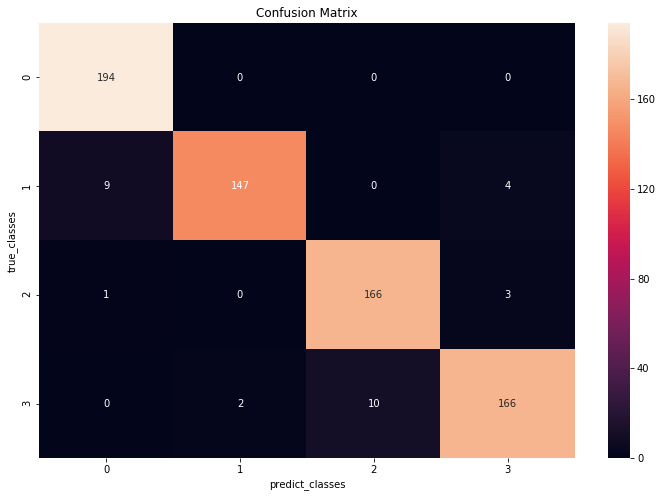

処理時間：30.314749002456665[s]


,text,true_label,pre_label
0,2ヶ月で全国を走り抜けた写真！若さを行動で表現して魂を繋ぐ【GRバトン 写真家リレー】,IT,ライフ
1,3姉妹の成長を瞬間的に捉えた妖艶で可憐な世界観,IT,ライフ
2,オリンピック最終日ロゴは閉会式！ Googleロゴがスポーツ関連画像に変化第十三弾,IT,スポーツ
3,ジメっとした気分を吹き飛ばせ！ いまが見ごろ、鎌倉の紫陽花写真の数々,IT,スポーツ
4,ユニークな携帯マナーが話題 に！ “さすが社学”早稲田大学の携帯マナーが秀逸だと話題に,IT,ライフ
5,今年の夏は湘南とお台場へGo！ ニコニコ神社、夏の出張はお台場と海の家,IT,スポーツ
6,個人スポンサー2万人達成！ロンドン五輪マラソン代表選手の藤原新選手,IT,スポーツ
7,御苦労さま！そしてありがとう！ スペースシャトル・ディスカバリー号、最後の飛行,IT,スポーツ
8,日本・香港・欧米の3カ国の違いを堪能！「OVERSEAS 2012」世界を選んだ写真家たち...,IT,ライフ
9,本日のGoogleロゴはやり投 Googleロゴがスポーツ関連画像に変化第七弾,IT,スポーツ


In [41]:
RF(A_index[0], B_index[0], C_index[0], D_index[0], E_index[0], F_index[0])

Train score: 1.0
正解率 =  0.9772079772079773
レポート
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       180
           1       0.98      0.97      0.98       193
           2       0.97      0.98      0.98       169
           3       0.97      0.96      0.97       160

    accuracy                           0.98       702
   macro avg       0.98      0.98      0.98       702
weighted avg       0.98      0.98      0.98       702

スポーツ : 0 / IT : 1 / 映画 : 2 / ライフ : 3


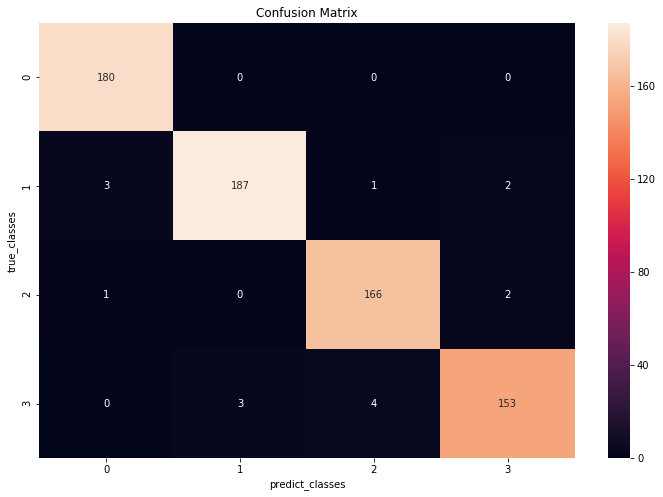

処理時間：25.863089084625244[s]


,text,true_label,pre_label
0,23年ぶりの天体ショー再び！ 14日未明は金星食を観測しよう！,IT,スポーツ
1,アナタはどっち派？「谷間」対「太もも」 じわじわ広がる「#女子ふともも晒し祭り」,IT,スポーツ
2,夏と言えば朝顔！ 小学生時代を思い起こさせるアサガオ観察日記ツイート,IT,ライフ
3,懐かしのヒーローが続々！ 名アニメーターが描くヒーローイラストが話題に,IT,映画
4,敗者は去れ？ 再挑戦を認めるか認めないかで荒れるクラウドファンディング「studyg...,IT,ライフ
5,無職ランナーをオリンピックへ！ プレアカ1か月分でスポンサーになれる,IT,スポーツ
6,おかもとまり「私、枕営業したことないですから！」,映画,ライフ
7,エイリアンの生態を徹底解剖！世界一の映像チームがつくる緻密な造形美術,映画,スポーツ
8,意外と使える海外ドラマ『弁護士イーライ』のビジネス術「情報に含まれる“心”を読み取れ！」,映画,ライフ
9,【オトナ女子コミック部】四姉妹と鎌倉と季節の情緒と。ひたひたと心に染みる群像劇『海街diary』,ライフ,映画


In [42]:
RF(A_index[1], B_index[1], C_index[1], D_index[1], E_index[1], F_index[1])

Train score: 1.0
正解率 =  0.9615384615384616
レポート
               precision    recall  f1-score   support

           0       0.93      1.00      0.96       174
           1       0.98      0.94      0.96       182
           2       0.96      0.98      0.97       168
           3       0.97      0.93      0.95       178

    accuracy                           0.96       702
   macro avg       0.96      0.96      0.96       702
weighted avg       0.96      0.96      0.96       702

スポーツ : 0 / IT : 1 / 映画 : 2 / ライフ : 3


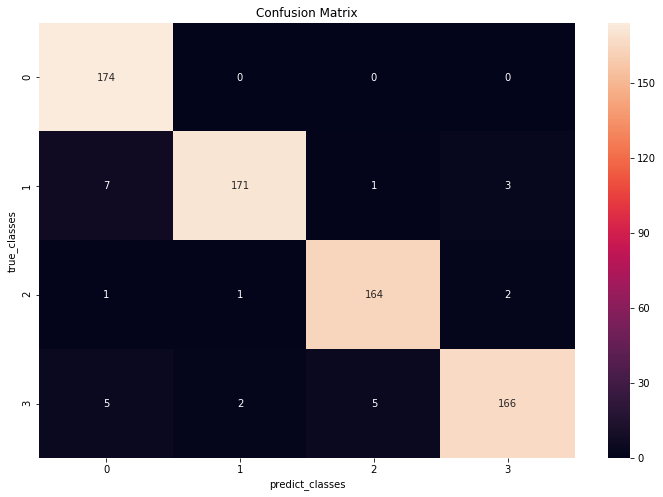

処理時間：38.58559608459473[s]


,text,true_label,pre_label
0,Googleロゴが往年の料理研究家に！ 本日のGoogleロゴは有名な料理研究家の生誕...,IT,スポーツ
1,これは商品化して欲しい！ テニプリベースのイヤホンジャックカバー,IT,スポーツ
2,カワイイは正義！ おかもとまりさんのカワイすぎる顔真似メイキングが反則過ぎる,IT,スポーツ
3,価格が安価で矯正を気づかれない！綺麗な歯並びになれる、歯列矯正の最前線,IT,ライフ
4,写真の中に「人」がいる！美し過ぎる愛娘を通して人を撮る写真家に極意を見た【NEXT GE...,IT,ライフ
5,川面を流れる花弁の美しさに感動！ 散った桜が川面を埋め尽くす光景のあまりの美しさが話題に,IT,スポーツ
6,愛される英王子 裸で敬礼！ ハリー英国王子に対する英国軍人の大いなる愛,IT,スポーツ
7,真夏のダンスに15万人が熱狂 大盛況だったニコニコダンスマスター4レポート,IT,映画
8,竜の巣？ これが…？ 富士山上空を覆う巨大雲が話題に,IT,スポーツ
9,細かな違いや使用感がわかる！ありそうでなかった白髪染め体験記サイト,IT,ライフ


In [43]:
RF(A_index[2], B_index[2], C_index[2], D_index[1], E_index[2], F_index[2])

Train score: 1.0
正解率 =  0.9572039942938659
レポート
               precision    recall  f1-score   support

           0       0.91      1.00      0.95       177
           1       0.99      0.94      0.96       155
           2       0.95      0.97      0.96       195
           3       0.99      0.91      0.95       174

    accuracy                           0.96       701
   macro avg       0.96      0.96      0.96       701
weighted avg       0.96      0.96      0.96       701

スポーツ : 0 / IT : 1 / 映画 : 2 / ライフ : 3


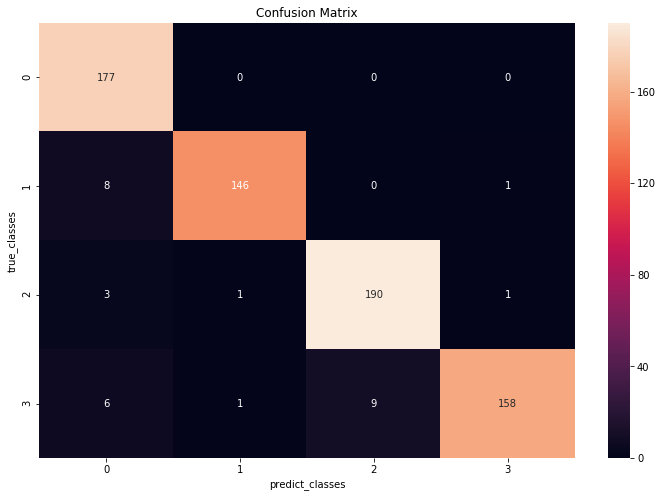

処理時間：32.9636332988739[s]


,text,true_label,pre_label
0,お前らどんだけ起きてんだよ！ 朝4時過ぎの朝焼け写真大量につき,IT,スポーツ
1,これからお花見の人は気を付けて！ 春の宴のあとのあまりの酷さに唖然,IT,スポーツ
2,なんだこの不思議な空は？ 神奈川周辺で見られた不思議な空が話題に,IT,スポーツ
3,スマホライフスタイルを提案！KDDI 甘田氏が語る、関西KDDIの強さの秘密,IT,スポーツ
4,プレイ可能なGoogleロゴ第四弾！ Googleロゴがスポーツ関連画像に変化第十一弾,IT,スポーツ
5,夏のボーナス金額は増！ ただし商品の購入に充てる割合は大幅減,IT,ライフ
6,本日のGoogleロゴは砲丸投 Googleロゴがスポーツ関連画像に変化第五弾,IT,スポーツ
7,毎日数十万番組！ニコニコ生放送の放送番組数が1億番組を突破,IT,スポーツ
8,紙飛行機に足が！ 思わず作ってみたくなる足の生えた紙ヒコーキ,IT,スポーツ
9,“和製レディー・ガガ”きゃりーぱみゅぱみゅ「ジワジワと世界征服したい」,映画,スポーツ


In [44]:
RF(A_index[3], B_index[3], C_index[3], D_index[3], E_index[3], F_index[3])

Train score: 1.0
正解率 =  0.9686162624821684
レポート
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       175
           1       0.97      0.97      0.97       179
           2       0.96      0.98      0.97       168
           3       0.98      0.93      0.95       179

    accuracy                           0.97       701
   macro avg       0.97      0.97      0.97       701
weighted avg       0.97      0.97      0.97       701

スポーツ : 0 / IT : 1 / 映画 : 2 / ライフ : 3


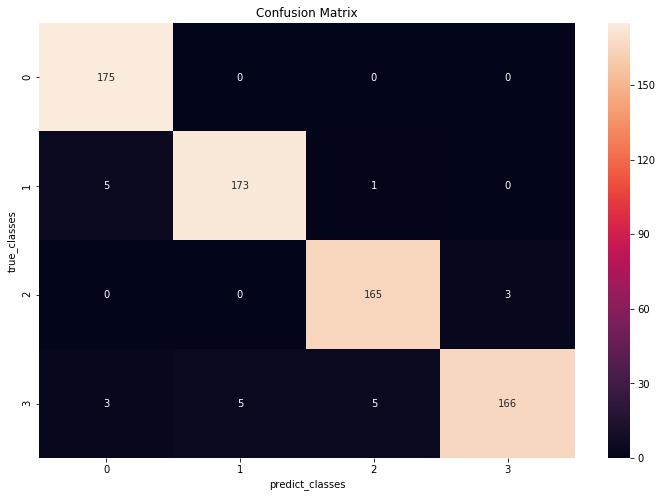

処理時間：35.66572380065918[s]


,text,true_label,pre_label
0,え？ホントかよ（笑） 合コン用語なる摩訶不思議な用語が話題に,IT,スポーツ
1,なるほどジ○リめしって言うのか！ あのオムライスは王蟲ライスだったのね！,IT,スポーツ
2,ワイルドな英語プリントだぜぇ！ スギちゃん風な英語の教材プリントが話題に,IT,スポーツ
3,本日のGoogleロゴは吊り輪 Googleロゴがスポーツ関連画像に変化第二弾,IT,スポーツ
4,本日はプレイ不可なロゴ！ Googleロゴがスポーツ関連画像に変化第十二弾,IT,スポーツ
5,美しい映像と音楽も必見！銀座の名所、ソニービル公式Facebook ページがオープン,IT,映画
6,インタビュー：MEGUMI＆西川史子＆重盛さと美「地上波では出来ないことしかやってない」,映画,ライフ
7,インタビュー：宮崎あおい＆堺雅人「一緒にいるのが当たり前」,映画,ライフ
8,坂下千里子、イケメン俳優のキスにメロメロ,映画,ライフ
9,“ファン待望”のフレーバーがついに登場 ピンクで可愛くリフレッシュ,ライフ,スポーツ


In [45]:
RF(A_index[4], B_index[4], C_index[4], D_index[4], E_index[4], F_index[4])